In [22]:
import numpy as np
from scipy.fft import fft
from scipy.fft import fftshift
import matplotlib.pyplot as plt


dc5_list=[]
sine5_list=[]
wgn5_list=[]

dc32_list=[]
sine32_list=[]
wgn32_list=[]

In [23]:
#converting the output from avr in hexadecimal to float type
def otpvec(filename):
    fd = open(filename)
    lines = fd.readlines()
    fd.close()
    list_of_lines_words = [line.split() for line in lines]
    final_list=[]
    for line in list_of_lines_words:
        for word in line:
            final_list.append(word)
    i=0
    num_list=[]
    while(i<len(final_list)):
        if final_list[i]=='00':
            i+=1
            num_list.append(int(final_list[i],16)/128)
        else:
            i+=1
            num_list.append((int(final_list[i],16)/128)-2)
        i+=1    
    return num_list        

In [24]:
sine5_list=otpvec("output_files/sine5out.txt")
sine32_list=otpvec("output_files/sine32out.txt")
wgn5_list=otpvec("output_files/wgn5out.txt")
wgn32_list=otpvec("output_files/wgn32out.txt")
dc5_list=otpvec("output_files/dc5out.txt")
dc32_list=otpvec("output_files/dc32out.txt")

In [25]:
def inpvec(csvfilename):
    matrix=[]
    import csv
    with open(csvfilename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            matrix.append(row)
    mat = matrix[0]
    for i,val in enumerate(mat):
        if val=='-0':
            mat[i]='0'
    mat2 = [float(x.strip('"')) for x in mat] 
    return mat2

sine_input=inpvec('sine_inp.csv')
wgn_input=inpvec('white_noise.csv')
dc_inp=[0.992]*1000

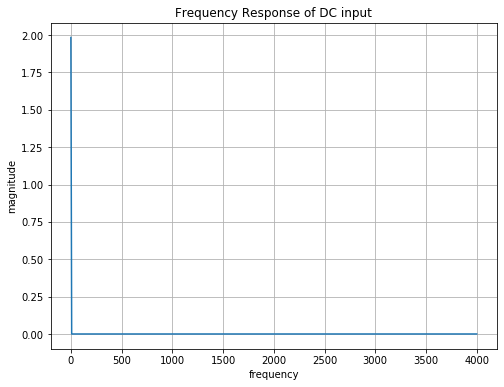

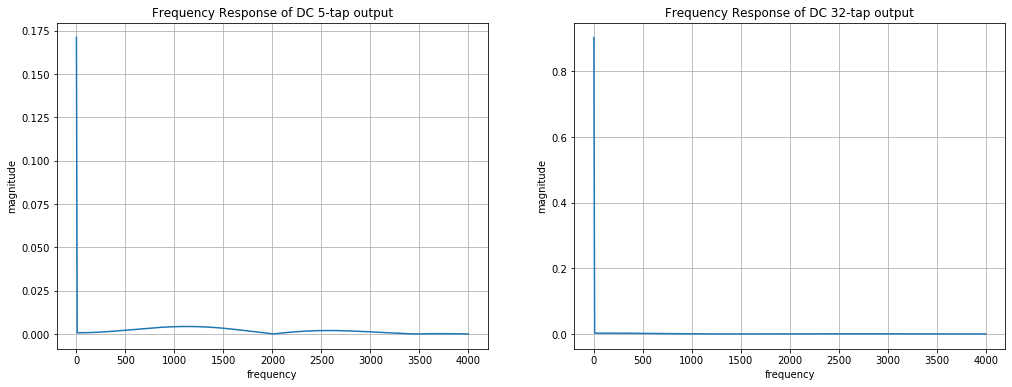

In [42]:

def DTFT(output_list,title):
    y=np.array(output_list)
    N = len(y)  #no of otp samples
    T = 1.0 / 8000.0
    Y = fft(y)
    w = np.linspace(0.0, 1.0/(2.0*T), N//2)
    
    plt.plot(w, 2.0/N * np.abs(Y[0:N//2]))
    plt.xlabel("frequency")
    plt.ylabel("magnitude")
    plt.title(title)
    plt.grid()

fig = plt.figure(figsize = (8,6))
DTFT(dc_inp,"Frequency Response of DC input")
fig = plt.figure(figsize = (17,6))
plt.subplot(121)
DTFT(dc5_list,"Frequency Response of DC 5-tap output")
plt.subplot(122)
DTFT(dc32_list,"Frequency Response of DC 32-tap output")

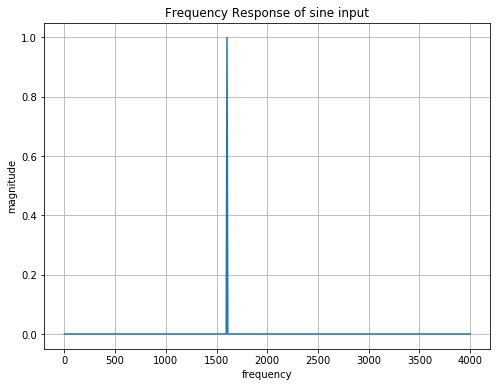

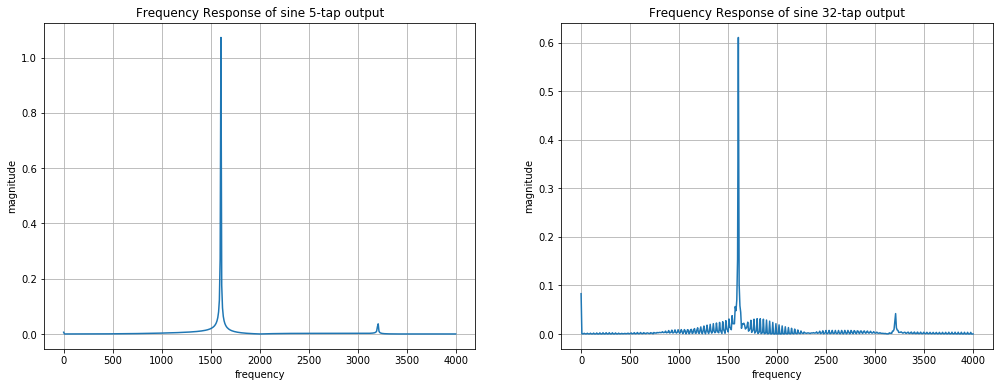

In [44]:
fig = plt.figure(figsize = (8,6))
DTFT(sine_input,"Frequency Response of sine input")
fig = plt.figure(figsize = (17,6))
plt.subplot(121)
DTFT(sine5_list,"Frequency Response of sine 5-tap output")
plt.subplot(122)
DTFT(sine32_list,"Frequency Response of sine 32-tap output")

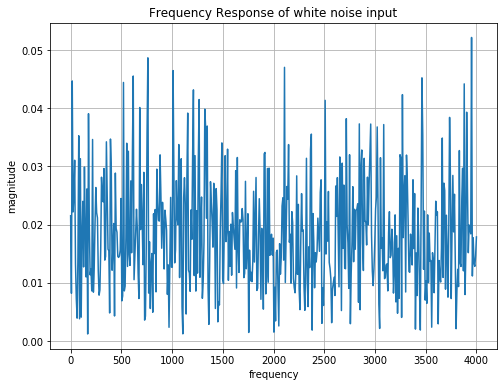

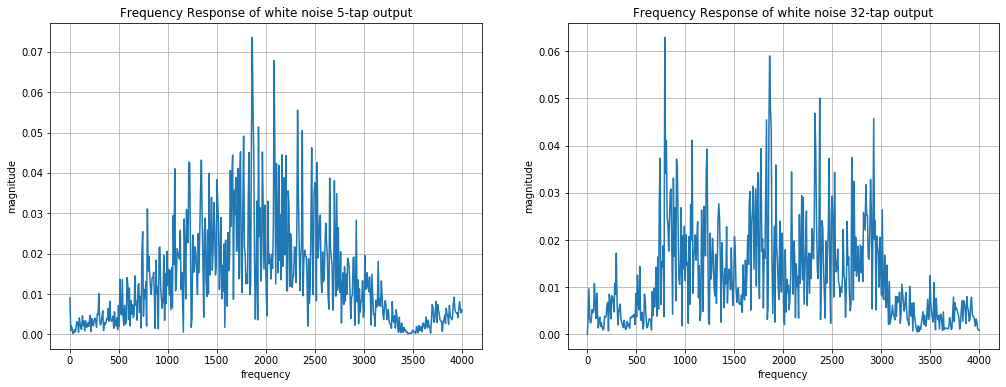

In [45]:
fig = plt.figure(figsize = (8,6))
DTFT(wgn_input,"Frequency Response of white noise input")
fig = plt.figure(figsize = (17,6))
plt.subplot(121)
DTFT(wgn5_list,"Frequency Response of white noise 5-tap output")
plt.subplot(122)
DTFT(wgn32_list,"Frequency Response of white noise 32-tap output")
#we can clearly see a band in the frequency range 800-3400Hz

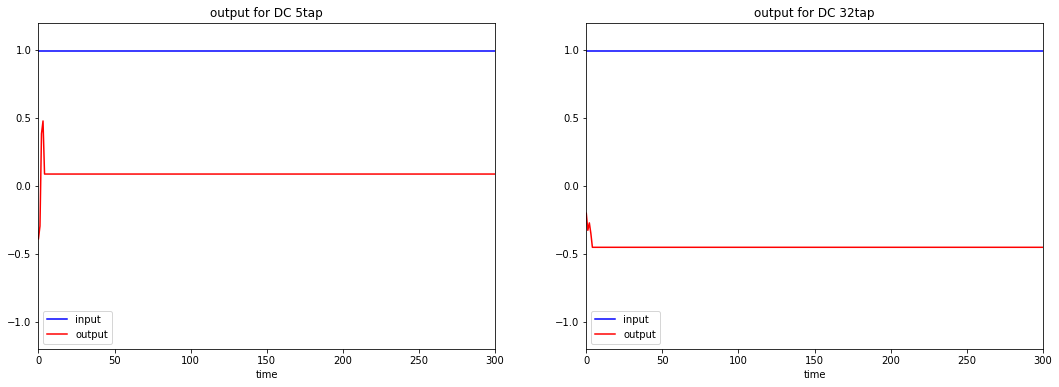

In [53]:
def inp_out_plt(inp,tap5,tap32,title1,title2,otp_color):
    fig = plt.figure(figsize = (18,6))
    plt.subplot(121)
    plt.plot(inp,color='b',label='input')
    plt.xlim(0,300)
    plt.ylim(-1.2,1.2)
    plt.plot(tap5,color=otp_color,label='output')
    plt.xlabel("time")
    plt.title(title1)
    plt.legend()
    
    plt.subplot(122)
    plt.plot(inp,color='b',label='input')
    plt.xlim(0,300)
    plt.ylim(-1.2,1.2)
    plt.plot(tap32,color=otp_color,label='output')
    plt.xlabel("time")
    plt.title(title2)
    plt.legend()
    
inp_out_plt(dc_inp,dc5_list,dc32_list,"output for DC 5tap","output for DC 32tap",'r')

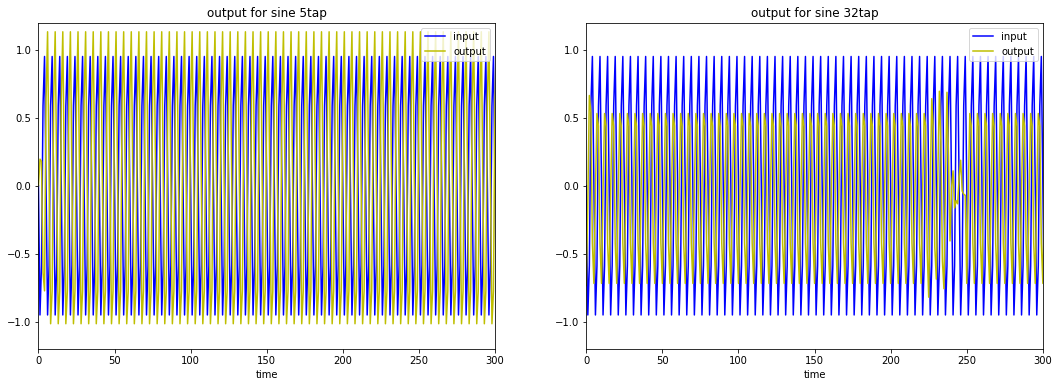

In [54]:
inp_out_plt(sine_input,sine5_list,sine32_list,"output for sine 5tap","output for sine 32tap",'y')

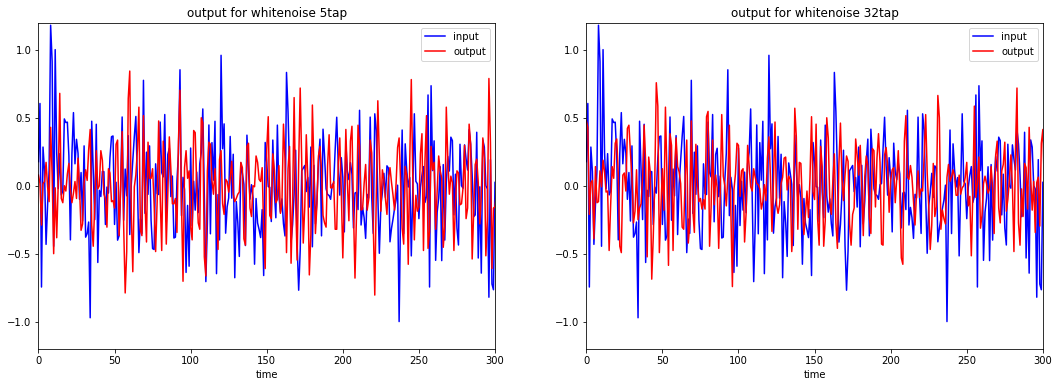

In [57]:
inp_out_plt(wgn_input,wgn5_list,wgn32_list,"output for whitenoise 5tap","output for whitenoise 32tap",'r')

2